# Fashion MNIST Image Classification

<hr>

<strong>Objective</strong>: build a machine learning model using tensorflow that predicts whether an image is a certain clothing class (dress, shirt, sneaker, etc.)

<hr>

### Dependencies

In [109]:
import tensorflow as tf
import keras
import numpy as np
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline
import matplotlib.pyplot as plt

### Load the Data

In [110]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [111]:
print(f"Shape of x: {x_train.shape}")
print(f"Shape of y: {y_train.shape}")
print("---" * 10)
print(f"Shape of x: {x_test.shape}")
print(f"Shape of y: {y_test.shape}")

Shape of x: (60000, 28, 28)
Shape of y: (60000,)
------------------------------
Shape of x: (10000, 28, 28)
Shape of y: (10000,)


<strong>Observation</strong>: there are 60,000 training samples and 10,000 testing samples. Each sample is 28x28, each 1x1 representing 1 pixel.

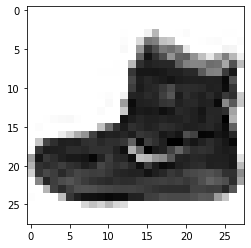

In [112]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

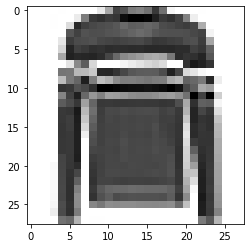

In [113]:
plt.imshow(x_train[5], cmap='binary')
plt.show()

In [114]:
print(y_train[0])
print(y_train[5])

9
2


In [115]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


- each output is currently labeled 0-9
- each number from 0-9 represents a piece of clothing

<strong>Pairings</strong>:
- 0 Shirt
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Boot

### Pairing clothing to the desired output listed above

In [116]:
labels = [
    'T-shirt / Top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Boot'
]

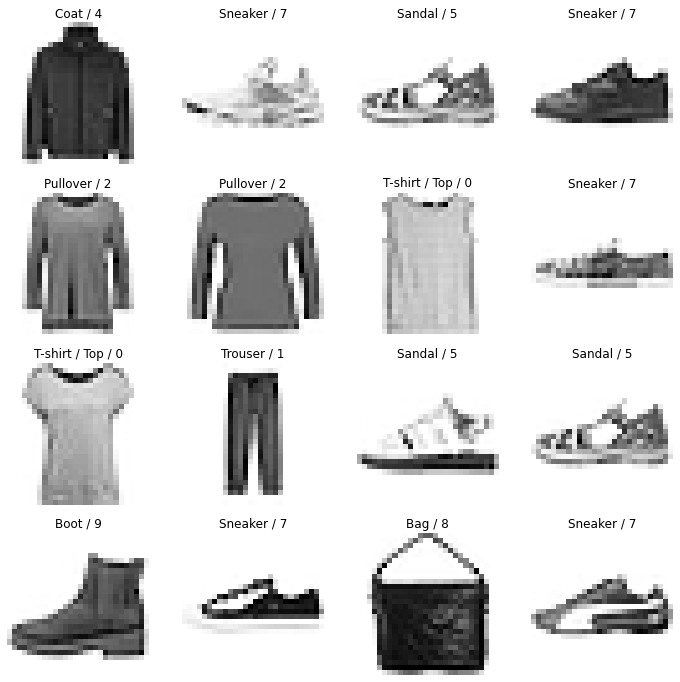

In [117]:
plt.figure(figsize=(12,12))
j = 1
for i in np.random.randint(0,1000,16):
    plt.subplot(4,4,j); j+=1
    plt.imshow(x_train[i],cmap = 'Greys')
    plt.axis('off')
    plt.title('{} / {}'.format(labels[y_train[i]],y_train[i]))

### One Hot Encoding the y-labels (output)



In [118]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [119]:
print(f"new shape of y_train: {y_train_encoded.shape}")
print(f"new shape of y_test: {y_test_encoded.shape}")

new shape of y_train: (60000, 10)
new shape of y_test: (10000, 10)


<strong>Observation</strong>: the y outputs are note 2dimensional, with 10 rows.

In [120]:
print(f"Example of New Encoded y-label: {y_train_encoded[0]}")
print(f"Example of New Encoded y-label: {y_train_encoded[5]}")

Example of New Encoded y-label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Example of New Encoded y-label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


<hr>

### Data Preprocessing

In [121]:
# Reshape the input data into a 2dimensional numpy array. 28x28=784
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
print(f"Training Input Set Shape: {x_train_reshaped.shape}")
print("---" * 10)
print(f"Testing Input Set Shape: {x_test_reshaped.shape}")

Training Input Set Shape: (60000, 784)
------------------------------
Testing Input Set Shape: (10000, 784)


In [122]:
# Normalization of the data

# define the constant
epsilon = 1e-10

# define the mean and standard deviations of the data
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

# Normalization formula --> Norm = ( input - M ) / std
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [123]:
print(f"Before Normalization: {set(x_train_reshaped[0])}")
print("---" * 10)
print(f"After Normalization: {set(x_train_norm[0])}")

Before Normalization: {0, 1, 2, 3, 4, 6, 7, 10, 12, 13, 15, 18, 23, 29, 35, 36, 40, 41, 44, 48, 52, 54, 55, 56, 57, 58, 61, 62, 64, 65, 66, 67, 69, 72, 73, 74, 75, 77, 80, 82, 88, 92, 98, 99, 102, 106, 107, 109, 115, 117, 119, 121, 122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155, 156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 255}
------------------------------
After Normalization: {-0.8102576563304191, -0.7769321664663864, -0.4103517779620258, 0.7004978841724001, 1.4558756544238098, 1.1448377490261705, 1.8002390496854819, 1.5003096409091867, 1.1004037625407934, 1.722479573336072, 1.5225266341518753

<hr>

### Create the Neural Network


In [124]:
model = Sequential([
    
    # Input Layer
    Dense(128, activation='relu', input_shape=(784,)),
    
    # First Hidden Layer
    Dense(128, activation='relu'),
    
    # Second Hidden Layer
    Dense(256, activation='relu'),
    
    # Output Layer
    Dense(10, activation='softmax')
])

<hr>

### Model Compilation

In [125]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 152,586
Trainable params: 152,586
Non-trainable params: 0
_________________________________________________________________


<hr>

### Train the model

In [126]:
model.fit(x_train_norm, y_train_encoded, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 2s 788us/step - loss: 0.8036 - accuracy: 0.7226
Epoch 2/15
1875/1875 [==============================] - 1s 796us/step - loss: 0.4105 - accuracy: 0.8507
Epoch 3/15
1875/1875 [==============================] - 1s 788us/step - loss: 0.3599 - accuracy: 0.8682
Epoch 4/15
1875/1875 [==============================] - 1s 789us/step - loss: 0.3354 - accuracy: 0.8790
Epoch 5/15
1875/1875 [==============================] - 1s 788us/step - loss: 0.3178 - accuracy: 0.8831
Epoch 6/15
1875/1875 [==============================] - 1s 794us/step - loss: 0.2991 - accuracy: 0.8910
Epoch 7/15
1875/1875 [==============================] - 1s 787us/step - loss: 0.2963 - accuracy: 0.8918
Epoch 8/15
1875/1875 [==============================] - 1s 789us/step - loss: 0.2709 - accuracy: 0.9008
Epoch 9/15
1875/1875 [==============================] - 1s 789us/step - loss: 0.2711 - accuracy: 0.8999
Epoch 10/15
1875/1875 [==============================] - 1s 791u

In [127]:
# Evaluate the model to ensure it didnt memorize the data and was truly trained
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100}")

313/313 [==============================] - 0s 470us/step - loss: 0.3307 - accuracy: 0.8812
Test Accuracy: 88.12000155448914
